# BaseBall Case Study

Baseball is a bat-and-ball game played between two opposing teams, of nine players each, that take turns batting and fielding. The game proceeds when a player on the fielding team, called the pitcher, throws a ball which a player on the batting team tries to hit with a bat. The objective of the offensive team (batting team) is to hit the ball into the field of play, allowing its players to run the bases, having them advance counter-clockwise around four bases to score what are called "runs". The objective of the defensive team (fielding team) is to prevent batters from becoming runners, and to prevent runners' advance around the bases. A run is scored when a runner legally advances around the bases in order and touches home plate (the place where the player started as a batter). The team that scores the most runs by the end of the game is the winner.

# Problem Statement

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

# Input features

R--Runs

AB--At Bats

H--Hits

2B--Doubles

3B--Triples

HR--Homeruns

BB--Walks

SO--Strikeouts

SB--Stolen Bases

RA--Runs Allowed

ER--Earned Runs

ERA--Earned Run Average (ERA)

SHO--Shutouts

SV--Saves

CG--Complete Games

E--Errors

# Target Variable

Number of predicted wins (W)

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
df=pd.read_csv('BaseBall.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


# To find shape and type of the dataset

In [3]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [3]:
df.shape

(30, 17)

In [4]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

# Data Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


This shows that there are 17 columns(features) among which only ERA is float type. All the other columns are Integer data type

The column CG has certain value as 0, which should be handled. Fill it with mode since its a discrete type of column

In [6]:
df['CG'].mode()

0    1
dtype: int64

In [7]:
df['CG']=df['CG'].replace(0, 1)

In [8]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,1,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


# Data Statistics

In [9]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.566667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.648140,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,1.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Observation

In columns 'R', 'HR','BB','SO','SB','RA','ER','CG','SV','E' there is large difference between 75th percentile and the maximum values. This implies there may be outliers present in the dataset.

In most columns the mean values are deviated rom median indicating the presence of Skewness in the dataset.

# Check For null values

In [10]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

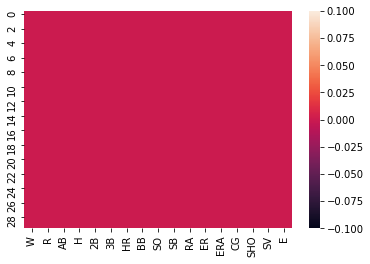

In [11]:
sns.heatmap(df.isnull())
plt.show()

There are no null values in the dataset. So we will proceed with the analysis.

Check The Dependant Variable

In [12]:
df['W'].value_counts()

68     3
83     2
74     2
76     2
81     2
64     1
93     1
92     1
90     1
88     1
87     1
86     1
85     1
84     1
80     1
97     1
100    1
78     1
63     1
79     1
71     1
67     1
98     1
95     1
Name: W, dtype: int64

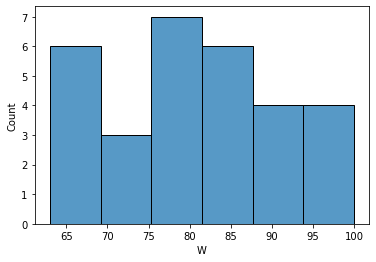

In [13]:
sns.histplot(df['W'])
plt.show()

The highest number of wins recorded are 75 to 84 times

# Univariate analysis

In [14]:
k= df.iloc[:,1:9]

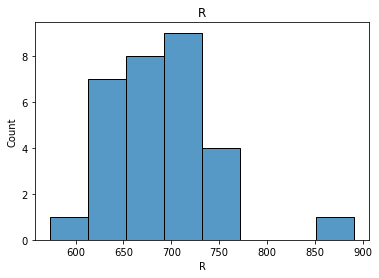

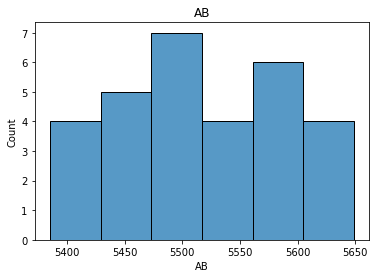

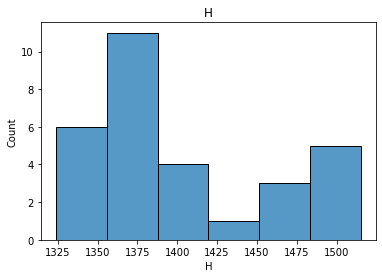

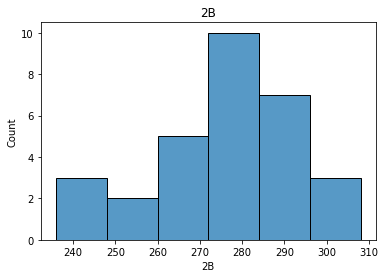

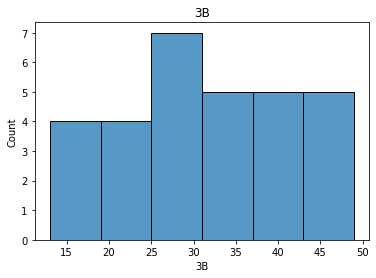

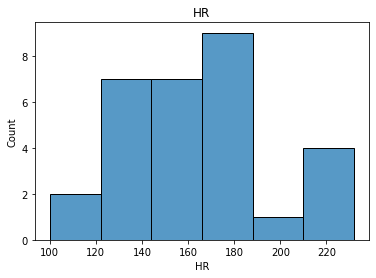

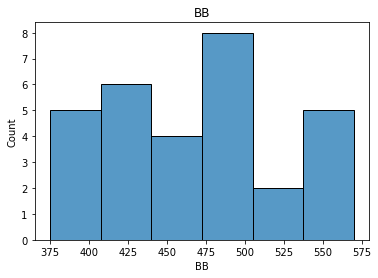

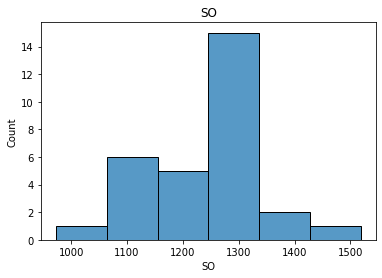

In [15]:
for i in k:
    sns.histplot(df[i])
    plt.title(i)
    plt.show()

# Observations:

The 'R'- Runs column is distributed from 550 to 900. 
700 to 740 runs are scored for most number of times. Highest runs are scored very less number of times.

In 'AB'- At Bats, is distributed from 5400 to 5640 range, whereas the highest number is recorded from 5475 to 5525.

In 'H'- Hits column the data is distributed from 1300 to 1500, the highest number recorded is around 1375.

Column '2B' are dispersed from 200 to 300, whereas column '3B' are dispersed from 15 to 500

'HR' column is distributed evenly within the range of 100 to 130, highest being recorded at 180.

'SO'- strike out column is distributed from 1000 to 1400.


In [16]:
k1=df.iloc[:,9:]

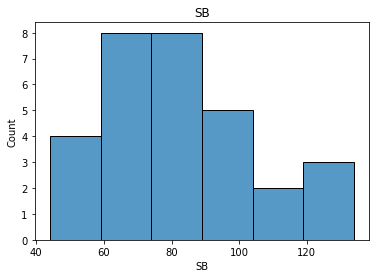

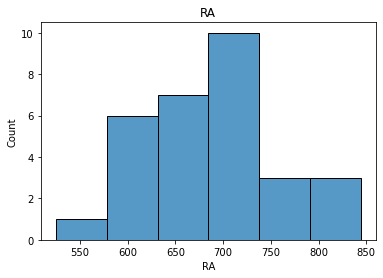

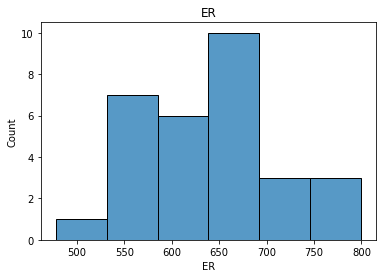

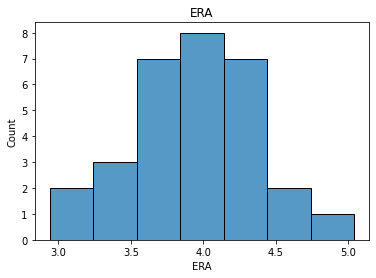

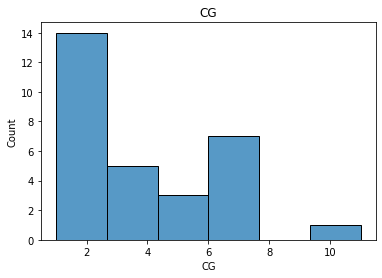

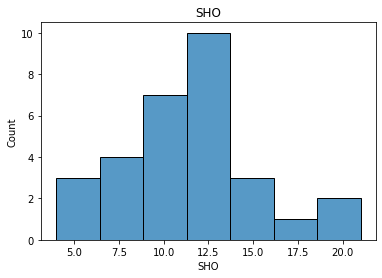

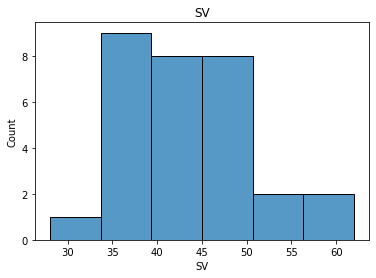

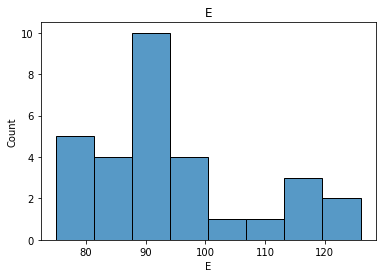

In [17]:
for i in k1:
    sns.histplot(df[i])
    plt.title(i)
    plt.show()

'SB'- it is dispersed from 40 to 130.

'RA'- Runs Allowed is dispersed from 500 to 850, the highest being recorded around 750.

'ER'- Earned Runs are distributed from 500 to 800 where as 'ERA'- Earned Runs Average is distrbuted from 3 to 5.

'CG'- Complete Games is distributed from 0 to 10, and the highest is from 0 to 1.

'SHO'- ShutOuts are distributed from 5 to 20 where as 'SV'- Saved games are dispersed from 30 to 60.

'E'- Erors are dispersed from 60 to 90, the highest being at 90.

In [18]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

# Find Correlation

In [19]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.092885,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232907,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.078818,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.163833,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.283907,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.077364,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.157630,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.447632,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.090157,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.019690,-0.106563,-0.183418,0.079149


<AxesSubplot:>

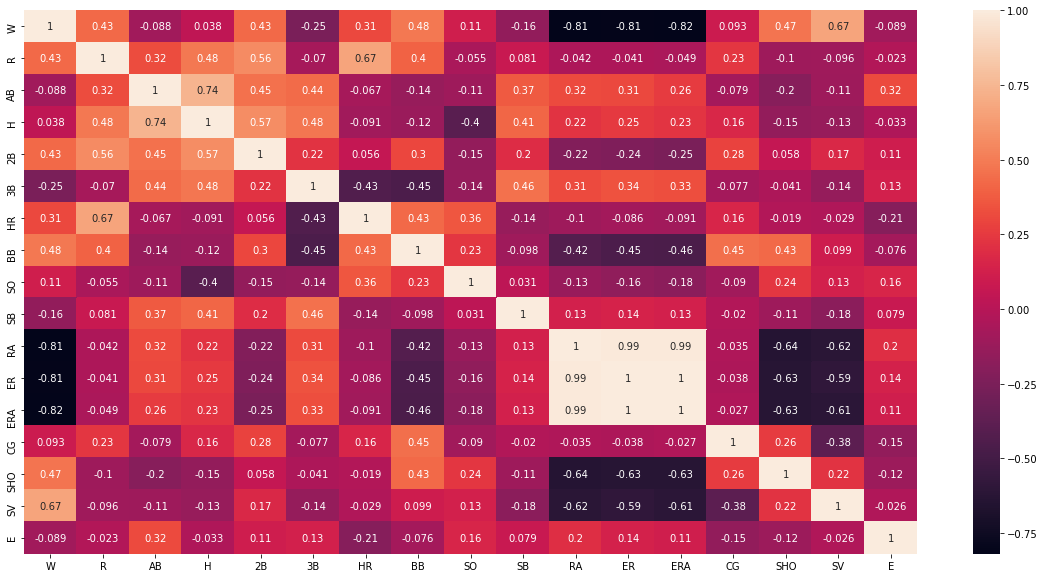

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

'ER' and 'RA' are highly correlated to eachother.'H' and 'AB' are highly correlated to eachother.

'H' and '2B' are correlated but less than AB. 

'SV' is highly correlated to the  target. 'BB' and 'SHO' are also positively correlated to target but less than that of 'SV'.
where as ERA has least correlation with target.

# Bivariate analysis with the target

W and R

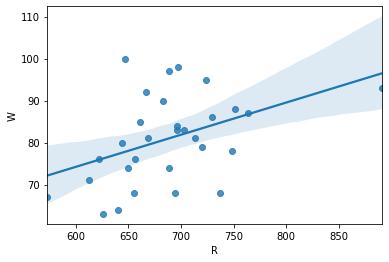

In [21]:
sns.regplot(x='R',y='W',data=df)
plt.show()

We could see RUNS have linear correlation with WIN.

Outliers may be present beyond 850

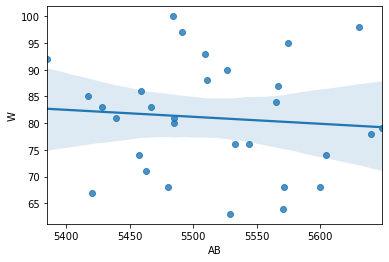

In [22]:
sns.regplot(x='AB',y='W',data=df)
plt.show()

AB is weekly correlated to WINS

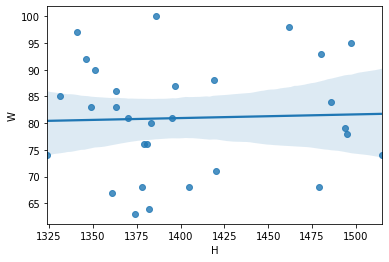

In [23]:
sns.regplot(x='H',y='W',data=df)
plt.show()

H is also weekly correlated to Wins

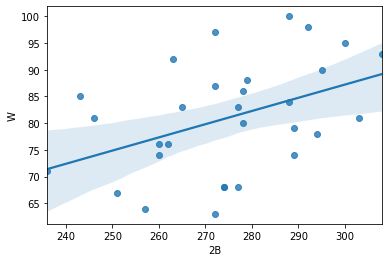

In [24]:
sns.regplot(x='2B',y='W',data=df)
plt.show()

This shows linear correlation to the target. Data is distributed evenly with no outliers

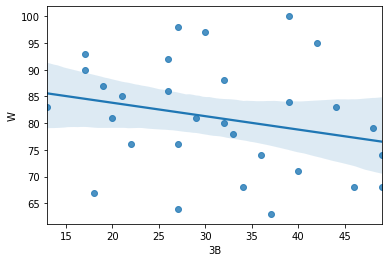

In [25]:
sns.regplot(x='3B',y='W',data=df)
plt.show()

Triples are negatively correlated to the target with no outliers present

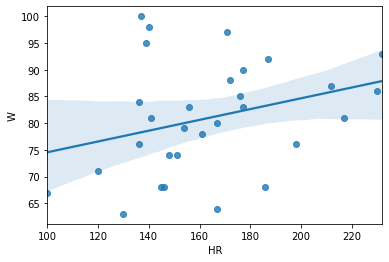

In [26]:
sns.regplot(x='HR',y='W',data=df)
plt.show()

HR has very little correlation with the WinS. Outliers are present here and there

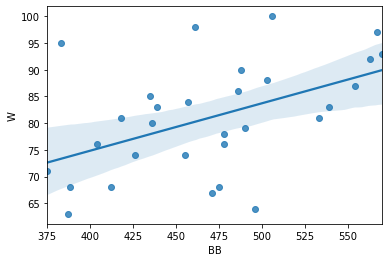

In [27]:
sns.regplot(x='BB',y='W',data=df)
plt.show()

BB(Walks) is highly correlated to Wins.

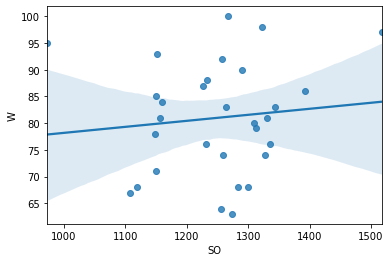

In [28]:
sns.regplot(x='SO',y='W',data=df)
plt.show()

SO is not correlated to Win. There are no outliers present

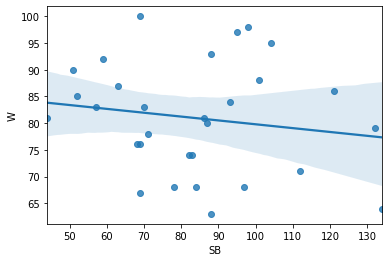

In [29]:
sns.regplot(x='SB',y='W',data=df)
plt.show()

SB also has no correlation with the target variable 'W'.

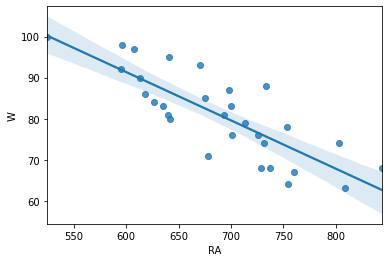

In [30]:
sns.regplot(x='RA',y='W',data=df)
plt.show()

RA is negatively correlated to Win. No outliers are present.

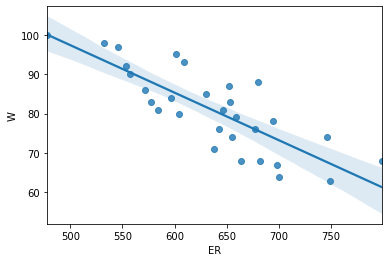

In [31]:
sns.regplot(x='ER',y='W',data=df)
plt.show()

ER is also negatively correlated to Wins. There are no outliers present.

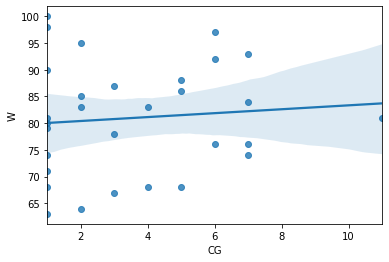

In [32]:
sns.regplot(x='CG',y='W',data=df)
plt.show()

CG has no correlation with the target variable

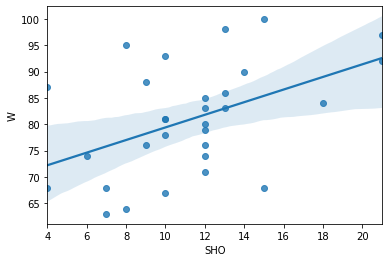

In [33]:
sns.regplot(x='SHO',y='W',data=df)
plt.show()

SHO has high correlation to Wins. 

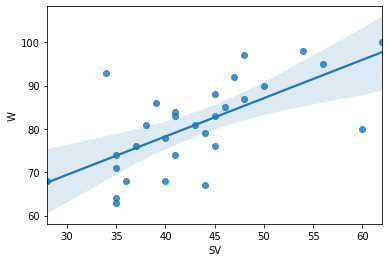

In [34]:
sns.regplot(x='SV',y='W',data=df)
plt.show()

SV has high correlation with Wins with no outliers

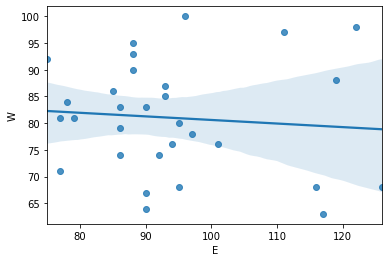

In [35]:
sns.regplot(x='E',y='W',data=df)
plt.show()

There are very less correlation with Wins.

In [36]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,1,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


# Check Multi Collinearity- VIF

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [212]:
df1=df.iloc[:,1:]
df1

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,1,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [213]:
df1.shape[1]

16

In [214]:
def vif_fun():
    vif=pd.DataFrame()
    vif['vif_factor']=[variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
    vif['features']= df1.columns
    return(vif)

In [215]:
vif_fun()

,vif_factor,features
0,1636.951656,R
1,4287.036648,AB
2,4830.581132,H
3,859.442824,2B
4,32.438118,3B
5,285.674181,HR
6,261.517040,BB
7,397.740663,SO
8,28.825746,SB
9,17148.381081,RA


Columns 'H' and 'AB' are correlated to each other. Among which 'AB' contributes less to the target, so we will drop the column AB.

'ER' and 'ERA' have high collinearity, in which ERA contributes less to the target compared to ER. So we will drop ERA.

# Drop The Columns With MultiCollinearity

In [216]:
df1.drop(['AB', 'ERA'], axis=1, inplace=True)
df1

,R,H,2B,3B,HR,BB,SO,SB,RA,ER,CG,SHO,SV,E
0,724,1497,300,42,139,383,973,104,641,601,2,8,56,88
1,696,1349,277,44,156,439,1264,70,700,653,2,12,45,86
2,669,1395,303,29,141,533,1157,86,640,584,11,10,38,79
3,622,1381,260,27,136,404,1231,68,701,643,7,9,37,101
4,689,1515,289,49,151,455,1259,83,803,746,7,12,35,86
5,891,1480,308,17,232,570,1151,88,670,609,7,10,34,88
6,764,1397,272,19,212,554,1227,63,698,652,3,4,48,93
7,713,1370,246,20,217,418,1331,44,693,646,1,10,43,77
8,644,1383,278,32,167,436,1310,87,642,604,1,12,60,95
9,748,1495,294,33,161,478,1148,71,753,694,3,10,40,97


In [217]:
vif_fun()

,vif_factor,features
0,1306.700883,R
1,2012.978270,H
2,836.369637,2B
3,31.187649,3B
4,232.848229,HR
5,249.791587,BB
6,364.041778,SO
7,27.717022,SB
8,15651.739684,RA
9,13620.086267,ER


Again 'ER' and 'RA' have high collinearity, in which the cotribution to the target variable is less with RA.

'2B' and 'R' have high collinearity, where R contributes the highest to the target. So we will drop columns '2B' and 'RA'



In [218]:
df1.drop(['RA', '2B'], axis=1, inplace=True)
df1

,R,H,3B,HR,BB,SO,SB,ER,CG,SHO,SV,E
0,724,1497,42,139,383,973,104,601,2,8,56,88
1,696,1349,44,156,439,1264,70,653,2,12,45,86
2,669,1395,29,141,533,1157,86,584,11,10,38,79
3,622,1381,27,136,404,1231,68,643,7,9,37,101
4,689,1515,49,151,455,1259,83,746,7,12,35,86
5,891,1480,17,232,570,1151,88,609,7,10,34,88
6,764,1397,19,212,554,1227,63,652,3,4,48,93
7,713,1370,20,217,418,1331,44,646,1,10,43,77
8,644,1383,32,167,436,1310,87,604,1,12,60,95
9,748,1495,33,161,478,1148,71,694,3,10,40,97


In [219]:
vif_fun()

,vif_factor,features
0,1173.573847,R
1,1740.787335,H
2,28.016779,3B
3,183.403710,HR
4,211.567743,BB
5,263.533016,SO
6,25.676038,SB
7,350.401217,ER
8,5.660697,CG
9,25.231494,SHO


The columns 'R' and 'H' still have high collinearity. We will drop it. H contributes least to the target variable

In [220]:
df1.drop(['H'], axis=1, inplace=True)
df1

,R,3B,HR,BB,SO,SB,ER,CG,SHO,SV,E
0,724,42,139,383,973,104,601,2,8,56,88
1,696,44,156,439,1264,70,653,2,12,45,86
2,669,29,141,533,1157,86,584,11,10,38,79
3,622,27,136,404,1231,68,643,7,9,37,101
4,689,49,151,455,1259,83,746,7,12,35,86
5,891,17,232,570,1151,88,609,7,10,34,88
6,764,19,212,554,1227,63,652,3,4,48,93
7,713,20,217,418,1331,44,646,1,10,43,77
8,644,32,167,436,1310,87,604,1,12,60,95
9,748,33,161,478,1148,71,694,3,10,40,97


In [221]:
vif_fun()

,vif_factor,features
0,385.659442,R
1,26.576289,3B
2,110.930533,HR
3,198.664156,BB
4,250.380300,SO
5,21.353596,SB
6,124.531148,ER
7,5.234233,CG
8,19.210651,SHO
9,48.073748,SV


Now the multi collinearity between the columns are removed. So we shall proceed for the removal of skewness

In [222]:
df2=df1

In [223]:
df2['W']=df['W']

In [224]:
df2

,R,3B,HR,BB,SO,SB,ER,CG,SHO,SV,E,W
0,724,42,139,383,973,104,601,2,8,56,88,95
1,696,44,156,439,1264,70,653,2,12,45,86,83
2,669,29,141,533,1157,86,584,11,10,38,79,81
3,622,27,136,404,1231,68,643,7,9,37,101,76
4,689,49,151,455,1259,83,746,7,12,35,86,74
5,891,17,232,570,1151,88,609,7,10,34,88,93
6,764,19,212,554,1227,63,652,3,4,48,93,87
7,713,20,217,418,1331,44,646,1,10,43,77,81
8,644,32,167,436,1310,87,604,1,12,60,95,80
9,748,33,161,478,1148,71,694,3,10,40,97,78


In [190]:
df1

,R,3B,HR,BB,SO,SB,ER,CG,SHO,SV,E,W
0,724,42,139,383,973,104,601,2,8,56,88,95
1,696,44,156,439,1264,70,653,2,12,45,86,83
2,669,29,141,533,1157,86,584,11,10,38,79,81
3,622,27,136,404,1231,68,643,7,9,37,101,76
4,689,49,151,455,1259,83,746,7,12,35,86,74
5,891,17,232,570,1151,88,609,7,10,34,88,93
6,764,19,212,554,1227,63,652,3,4,48,93,87
7,713,20,217,418,1331,44,646,1,10,43,77,81
8,644,32,167,436,1310,87,604,1,12,60,95,80
9,748,33,161,478,1148,71,694,3,10,40,97,78


# Check For Skewness

In [64]:
df2.skew().sort_values(ascending=False)

R      1.200786
E      0.890132
CG     0.875015
SV     0.657524
SHO    0.565790
HR     0.516441
SB     0.479893
BB     0.158498
3B     0.129502
ER     0.058710
W      0.047089
SO    -0.156065
dtype: float64

In [124]:
m=df2.columns


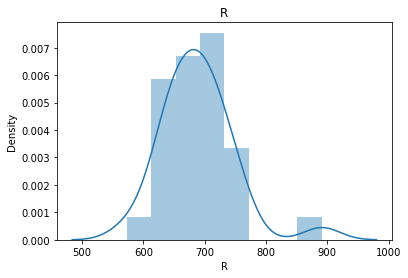

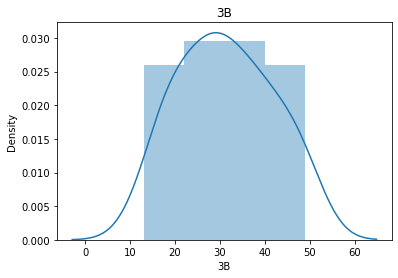

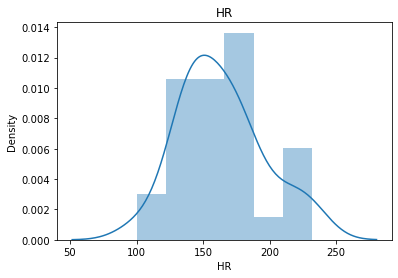

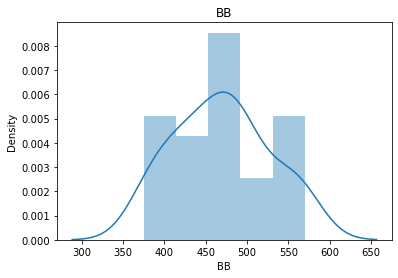

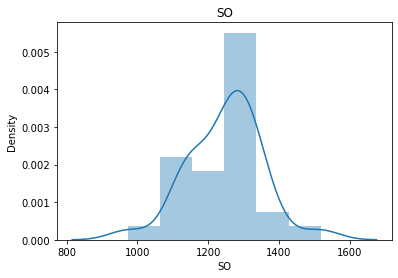

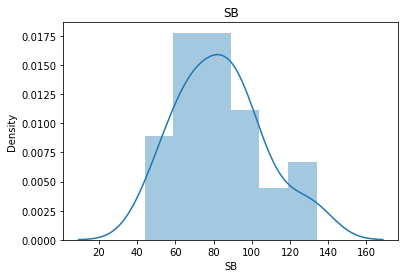

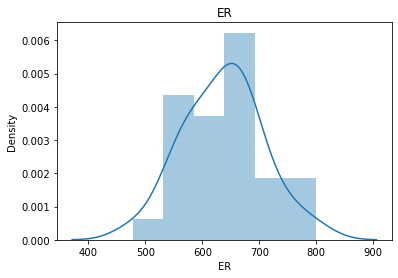

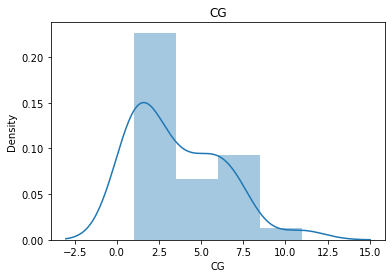

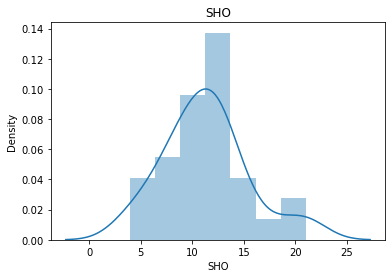

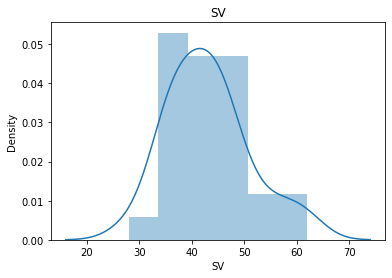

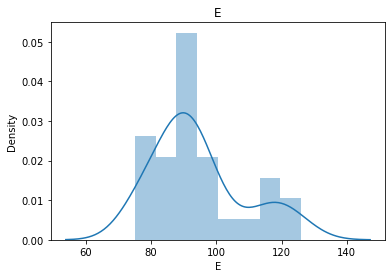

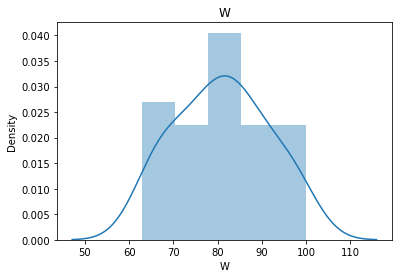

In [125]:
for i in m:
    sns.distplot(df2[i])
    plt.title(i)
    plt.show()

Right Skewed Columns- Triples(3B),HomeRuns(HR), Earned Runs Average(ERA),ShutOuts(SHO), Error(E)

Left Skewed Columns- Doubles(2B),SrikeOut(SB)

Remove skewness with log Transform

Log Transform

In [126]:
m=df2.columns

In [127]:
for i in m:
    df2[i]= np.log(df2[i])

In [128]:
df2

,R,3B,HR,BB,SO,SB,ER,CG,SHO,SV,E,W
0,6.584791,3.737670,4.934474,5.948035,6.880384,4.644391,6.398595,0.693147,2.079442,4.025352,4.477337,4.553877
1,6.545350,3.784190,5.049856,6.084499,7.142037,4.248495,6.481577,0.693147,2.484907,3.806662,4.454347,4.418841
2,6.505784,3.367296,4.948760,6.278521,7.053586,4.454347,6.369901,2.397895,2.302585,3.637586,4.369448,4.394449
3,6.432940,3.295837,4.912655,6.001415,7.115582,4.219508,6.466145,1.945910,2.197225,3.610918,4.615121,4.330733
4,6.535241,3.891820,5.017280,6.120297,7.138073,4.418841,6.614726,1.945910,2.484907,3.555348,4.454347,4.304065
5,6.792344,2.833213,5.446737,6.345636,7.048386,4.477337,6.411818,1.945910,2.302585,3.526361,4.477337,4.532599
6,6.638568,2.944439,5.356586,6.317165,7.112327,4.143135,6.480045,1.098612,1.386294,3.871201,4.532599,4.465908
7,6.569481,2.995732,5.379897,6.035481,7.193686,3.784190,6.470800,0.000000,2.302585,3.761200,4.343805,4.394449
8,6.467699,3.465736,5.117994,6.077642,7.177782,4.465908,6.403574,0.000000,2.484907,4.094345,4.553877,4.382027
9,6.617403,3.496508,5.081404,6.169611,7.045777,4.262680,6.542472,1.098612,2.302585,3.688879,4.574711,4.356709


In [129]:
df2.skew()[np.abs(df1.skew())<0.25].all()

True

In [61]:
#df1=pd.DataFrame(df1, columns=df1.columns)

In [130]:
df2

,R,3B,HR,BB,SO,SB,ER,CG,SHO,SV,E,W
0,6.584791,3.737670,4.934474,5.948035,6.880384,4.644391,6.398595,0.693147,2.079442,4.025352,4.477337,4.553877
1,6.545350,3.784190,5.049856,6.084499,7.142037,4.248495,6.481577,0.693147,2.484907,3.806662,4.454347,4.418841
2,6.505784,3.367296,4.948760,6.278521,7.053586,4.454347,6.369901,2.397895,2.302585,3.637586,4.369448,4.394449
3,6.432940,3.295837,4.912655,6.001415,7.115582,4.219508,6.466145,1.945910,2.197225,3.610918,4.615121,4.330733
4,6.535241,3.891820,5.017280,6.120297,7.138073,4.418841,6.614726,1.945910,2.484907,3.555348,4.454347,4.304065
5,6.792344,2.833213,5.446737,6.345636,7.048386,4.477337,6.411818,1.945910,2.302585,3.526361,4.477337,4.532599
6,6.638568,2.944439,5.356586,6.317165,7.112327,4.143135,6.480045,1.098612,1.386294,3.871201,4.532599,4.465908
7,6.569481,2.995732,5.379897,6.035481,7.193686,3.784190,6.470800,0.000000,2.302585,3.761200,4.343805,4.394449
8,6.467699,3.465736,5.117994,6.077642,7.177782,4.465908,6.403574,0.000000,2.484907,4.094345,4.553877,4.382027
9,6.617403,3.496508,5.081404,6.169611,7.045777,4.262680,6.542472,1.098612,2.302585,3.688879,4.574711,4.356709


In [72]:
df1.shape

(30, 12)

In [101]:
#df1['W']=df['W']

# Check For OutLiers

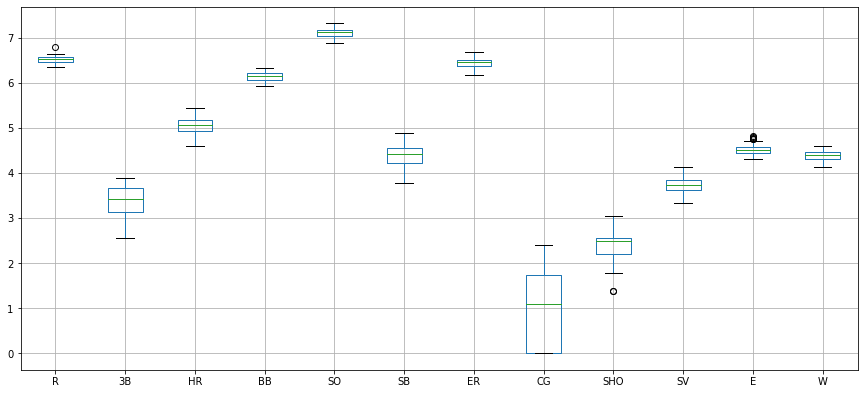

In [131]:
df2.boxplot(figsize=(15,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

 The columns 'R', 'E','SHO' seems to be with outliers. We shall work towards removing outliers

In [132]:
from scipy.stats import zscore
z=np.abs(zscore(df2))
z

array([[0.66538462, 0.9991578 , 0.76365393, 1.63079125, 2.95314736,
        0.94020366, 0.45913966, 0.35120965, 0.70631495, 1.57859883,
        0.42662861, 1.30960526],
       [0.17962404, 1.13082801, 0.15647961, 0.49308812, 0.19224208,
        0.51395533, 0.29712572, 0.35120965, 0.33345694, 0.33797206,
        0.59144836, 0.2569715 ],
       [0.30766209, 0.04914777, 0.68847703, 1.12447229, 0.87104747,
        0.24215707, 0.72064446, 1.7790443 , 0.13408719, 0.62120023,
        1.20012163, 0.06683544],
       [1.20480139, 0.25140515, 0.87847216, 1.18576342, 0.1257734 ,
        0.62042906, 0.15648116, 1.21424349, 0.40427295, 0.77248955,
        0.56119008, 0.42984156],
       [0.05513009, 1.43546572, 0.32790497, 0.19464035, 0.14459537,
        0.11173793, 1.51058577, 1.21424349, 0.33345694, 1.08773806,
        0.59144836, 0.63772567],
       [3.22158785, 1.56081427, 1.93202655, 1.68400913, 0.93354977,
        0.32659956, 0.33862767, 1.21424349, 0.13408719, 1.25218475,
        0.42662861,

In [133]:
# threshold for zscore is 3........., zscore greater than 3 is outliers
threshold =3
print(np.where(z>3))

(array([5], dtype=int64), array([0], dtype=int64))


In [134]:
df_new= df2[(z<3).all(axis=1)]

In [135]:
df_new.shape

(29, 12)

In [137]:
df2.shape

(30, 12)

# Loss Percentage

In [138]:
loss_percent= (30-29)/30*100
loss_percent

3.3333333333333335

Very less percent of the data is lost. So we shall proceed with Model Training

# Spliting the data and Balancing 

In [148]:
x= df2.iloc[:,0:-1]
y=df_new.iloc[:,-1]

In [149]:
y.value_counts()

4.219508    3
4.418841    2
4.330733    2
4.304065    2
4.394449    2
4.521789    1
4.382027    1
4.356709    1
4.204693    1
4.143135    1
4.158883    1
4.465908    1
4.477337    1
4.442651    1
4.584967    1
4.574711    1
4.605170    1
4.369448    1
4.553877    1
4.454347    1
4.499810    1
4.430817    1
4.262680    1
4.532599    1
Name: W, dtype: int64

I have removed skewness in target variable also. The target variable with skewness is of different range from the other independent variables and it gave a very least accuracy.
Now after log transform, the WINS are of same range to other varibles. Now we shall handle it with Regression models

# Train The Model

In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

# TO Find Best Random State

In [151]:
maxAcc=0
maxRS=0

for i in range(1,100):
    xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=.25,random_state=i)
    lr=LinearRegression()
    lr.fit(xtrain,ytrain)
    predlr= lr.predict(xtest)
    acc= r2_score(ytest,predlr)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best Accuracy_score is", maxAcc, 'on Random_state',maxRS)

Best Accuracy_score is 0.949449995496546 on Random_state 7


# To Find Best CV_Score

In [152]:
pred_tr= lr.predict(xtrain)
pred_ts= lr.predict(xtest)

In [153]:
train_score= r2_score(ytrain,pred_tr)
test_score= r2_score(ytest,pred_ts)

In [154]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score= cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_score} and the accuracy for testing is {test_score}")
    print("\n")

At cross fold 2 the cv score is -0.6104692053428218 and accuracy score for training is 0.9554443630997139 and the accuracy for testing is 0.9043397220455153


At cross fold 3 the cv score is 0.7184705443252667 and accuracy score for training is 0.9554443630997139 and the accuracy for testing is 0.9043397220455153


At cross fold 4 the cv score is 0.8741870246424017 and accuracy score for training is 0.9554443630997139 and the accuracy for testing is 0.9043397220455153


At cross fold 5 the cv score is 0.5871474806874932 and accuracy score for training is 0.9554443630997139 and the accuracy for testing is 0.9043397220455153


At cross fold 6 the cv score is 0.7062037966821473 and accuracy score for training is 0.9554443630997139 and the accuracy for testing is 0.9043397220455153


At cross fold 7 the cv score is 0.6148209357022739 and accuracy score for training is 0.9554443630997139 and the accuracy for testing is 0.9043397220455153


At cross fold 8 the cv score is 0.7113806025036189 

CV_score is high with Cv=4. R2 score is high with random_state=7. We shall use these values for other models also.

In [155]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25, random_state=7)

# LinearRegression

In [156]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
predlr= lr.predict(xtest)
print('R2=', r2_score(ytest,predlr))
print('MSE=', mean_squared_error(ytest,predlr))
print('MBE=', mean_absolute_error(ytest,predlr))

R2= 0.949449995496546
MSE= 0.0009508501992495642
MBE= 0.023200231339792765


In [157]:
cr_lr=cross_val_score(lr,x,y, cv=4)
print('Cross Validation Score of LinearRegression is:', cr_lr.mean())

Cross Validation Score of LinearRegression is: 0.8741870246424017


R2 Score and CV score are nearly equal, indicating the model works well

# Decision Tree Regressor

In [158]:
dtc=DecisionTreeRegressor()
dtc.fit(xtrain,ytrain)
preddtc= dtc.predict(xtest)
print('Score:',dtc.score(xtrain,ytrain))
print('mean_squared_error', mean_squared_error(ytest,preddtc))
print('mean_absolute_error:', mean_absolute_error(preddtc,ytest))
print('r2_score:', r2_score(preddtc,ytest))

Score: 1.0
mean_squared_error 0.007846627547114791
mean_absolute_error: 0.0718325250867684
r2_score: 0.2768125115029052


In [159]:
cr_dtc=cross_val_score(dtc,x,y, cv=4)
print('Cross Validation Score of DecisionTreeRegressor is:', cr_dtc.mean())

Cross Validation Score of DecisionTreeRegressor is: -0.12426919744250703


R2 score and cv score are not matching, indicating that the model doesnt perform well with the dataset

# RandomForestRegressor

In [160]:
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
predrf= rf.predict(xtest)
print('mean_squared_error', mean_squared_error(ytest,predrf))
print('mean_absolute_error:', mean_absolute_error(predrf,ytest))
print('Rf Score', rf.score(xtrain,ytrain))
print('r2_score:', r2_score(predrf,ytest))

mean_squared_error 0.008268120319261558
mean_absolute_error: 0.07178736053910506
Rf Score 0.9276473172166568
r2_score: -0.2623275790924575


R2 score is negative which means the model doesnt work well with the dataset. CV score checking is not necessary for this model

# SVR

In [161]:
svc=SVR(kernel='linear')
svc.fit(xtrain,ytrain)
predsvc= svc.predict(xtest)
print('mean_squared_error', mean_squared_error(ytest,predsvc))
print('mean_absolute_error:', mean_absolute_error(predsvc,ytest))
print('Score:', svc.score(xtrain,ytrain))
print('r2_score:', r2_score(predsvc,ytest))

mean_squared_error 0.01818141522305333
mean_absolute_error: 0.1139813156763545
Score: 0.6604541676287965
r2_score: -7.125848792638907


R2 score is negative which means the model doesnt work well with the dataset. CV score checking is not necessary for this model

Among all the models, LinearRegression shows highest performance, the error is also very less. So we shall improve it with Lasso Regularization, Since Linear Regression doesnt have hyper parameter tuning

Regularization is used to minimize the adjusted loss function and prevent overfitting or underfitting.

# Regularization

In [162]:
from sklearn.linear_model import Lasso, Ridge

Lasso

In [163]:
Lasso()

Lasso()

In [164]:
ls=Lasso(alpha=0.0001)
ls.fit(xtrain,ytrain)
ls.score(xtrain,ytrain)

0.9408824097436064

In [165]:
predls= ls.predict(xtest)
print(r2_score(ytest,predls))

0.9516921908566478


Ridge

In [166]:
rd= Ridge(alpha=0.0001)
rd.fit(xtrain,ytrain)
predrd= rd.predict(xtest)
print('mean_squared_error', mean_squared_error(ytest,predrd))
print('mean_absolute_error:', mean_absolute_error(predrd,ytest))
print('Score:', rd.score(xtrain,ytrain))
print('r2_score:', r2_score(predrd,ytest))

mean_squared_error 0.0009508444382130149
mean_absolute_error: 0.023147762658096482
Score: 0.9415891371895635
r2_score: 0.9354112427074857


Lasso Regularization gives better results and good accuracy of 95%. We shall tune parameters for Lasso with Grid Search CV to check for overfitiing.

# GRIDSEARCHCV

In [167]:
from sklearn.model_selection import GridSearchCV

In [168]:
Lasso()

Lasso()

In [169]:
parameters={'alpha': [0.0001, 0.001, 0.01,],
            'selection': ['cyclic', 'random'],
            'fit_intercept':['True','False'],
            'max_iter': [500,1000,2000]}

In [170]:
GCV=GridSearchCV(Lasso(), parameters, cv=4, scoring='r2')
GCV.fit(xtrain,ytrain)
GCV.best_params_

{'alpha': 0.001,
 'fit_intercept': 'True',
 'max_iter': 2000,
 'selection': 'random'}

In [171]:
GCV.best_estimator_

Lasso(alpha=0.001, fit_intercept='True', max_iter=2000, selection='random')

In [172]:
GCV_pred=GCV.best_estimator_.predict(xtest)
r2_score(ytest,GCV_pred)

0.9093068595272926

In [173]:
ls=Lasso(alpha= 0.0001,
         fit_intercept= 'False',
         max_iter= 2000,
         selection= 'random')
ls.fit(xtrain,ytrain)
predls= ls.predict(xtest)
print('mean_squared_error', mean_squared_error(ytest,predls))
print('mean_absolute_error:', mean_absolute_error(predls,ytest))
print('Score:', ls.score(xtrain,ytrain))
print('r2_score:', r2_score(predls,ytest))

mean_squared_error 0.0009088127739520883
mean_absolute_error: 0.022553249145313092
Score: 0.9408806152724363
r2_score: 0.9357852549155279


After Hyper Parameter tuning, Lasso regression gave r2 Score of 94%. which shows the model works well with the dataset

# Save The Model

In [174]:
import pickle
filename= 'BaseBall.pkl'
pickle.dump(lr,open(filename, 'wb'))

# Compare Original results with the Predicted Results

In [175]:
x=np.array(ytest)
predicted= np.array(ls.predict(xtest))
df_con= pd.DataFrame({'original': x, 'Predicted': predicted}, index= range(len(x)))
df_con

,original,Predicted
0,4.394449,4.408844
1,4.574711,4.517394
2,4.418841,4.406460
3,4.356709,4.388096
4,4.454347,4.446501
5,4.532599,4.529132
6,4.219508,4.270071
7,4.143135,4.146205


The predicted values are nearly equal to the original values, which indicates the model performs well with the dataset